<a href="https://colab.research.google.com/github/JosephGeorgeMtech/Flowers_Classification_CNN/blob/main/Flowers_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/Flowers_CNN')

In [3]:
pwd()


'/content/drive/MyDrive/Flowers_CNN'

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

In [5]:
import numpy as np
np.random.seed(42)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import glob
import PIL
from PIL import Image

In [8]:
! unzip '/content/drive/MyDrive/Flowers_CNN/Flower_dataset.zip' -d '/content/drive/MyDrive/Flowers_CNN'

Archive:  /content/drive/MyDrive/Flowers_CNN/Flower_dataset.zip
replace /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg  
  inflating: /content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1265350143_6e2b276ec9.jpg  

In [9]:
imgFiles = glob.glob("/content/drive/MyDrive/Flowers_CNN/tiny_FR/*/*.jpg")
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg


In [10]:
type(imgFiles)

list

In [11]:
print(imgFiles)

['/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/147068564_32bb4350cc.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/154332674_453cea64f4.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/153210866_03cc9f2f36.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1354396826_2868631432_m.jpg', '/content/drive/MyDrive/Flowers_CNN/tiny_FR/daisy/1299501272_5

In [12]:
print(len(imgFiles))

500


In [13]:
X = []
y = []

In [14]:
for fName in imgFiles:
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i)/255.0   #Normalizing the X between 0 and 1, i.e converting 0 to 255 values of each pixel between 0 and 1 
  X.append(X_i)
  label = fName.split("/")
  y_i = label[6]
  y.append(y_i)

In [15]:
#for fName in imgFiles:
#  label = fName.split("/")  # to check the label's position inside directory
#label

In [16]:
X

[array([[[0.04705882, 0.15686275, 0.0627451 ],
         [0.04313725, 0.15294118, 0.0627451 ],
         [0.04705882, 0.15686275, 0.06666667],
         ...,
         [0.19607843, 0.12941176, 0.10588235],
         [0.18823529, 0.11764706, 0.10588235],
         [0.18823529, 0.11764706, 0.10588235]],
 
        [[0.05098039, 0.16078431, 0.07058824],
         [0.04705882, 0.15686275, 0.06666667],
         [0.05098039, 0.16078431, 0.07058824],
         ...,
         [0.19607843, 0.1254902 , 0.10588235],
         [0.19607843, 0.11372549, 0.11372549],
         [0.19607843, 0.11764706, 0.11372549]],
 
        [[0.05490196, 0.16470588, 0.0745098 ],
         [0.05490196, 0.16470588, 0.0745098 ],
         [0.05882353, 0.16862745, 0.07843137],
         ...,
         [0.2       , 0.1254902 , 0.10588235],
         [0.19607843, 0.11764706, 0.10588235],
         [0.19607843, 0.12156863, 0.10980392]],
 
        ...,
 
        [[0.        , 0.03921569, 0.00784314],
         [0.01176471, 0.04313725, 0.01568

In [17]:
print(y)

['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [18]:
print(len(y))

500


In [19]:
print(set(y))

{'daisy', 'rose', 'dandelion', 'sunflower', 'tulip'}


In [20]:
# converting the categorical label from text to number 
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

In [21]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [22]:
print(set(y))

{0, 1, 2, 3, 4}


In [23]:
print(lEncoder.classes_)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(500, 299, 299, 3)

In [26]:
y.shape

(500,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [28]:
print("X_train_shape: {}".format(X_train.shape))

X_train_shape: (400, 299, 299, 3)


In [29]:
print("X_test_shape: {}".format(X_test.shape))

X_test_shape: (100, 299, 299, 3)


In [30]:
print("y_train_shape: {}".format(y_train.shape))

y_train_shape: (400,)


In [31]:
print("y_test_shape: {}".format(y_test.shape))

y_test_shape: (100,)


In [32]:
#Manual standard-scalar the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu)/std   #apply feature scaling to X_train
X_test_std = (X_test - mu)/std     #apply feature scaling to X_test

In [37]:
print(X_train_std.shape)
print(X_train_std.shape[0])
print(X_train_std.shape[:2])
print(X_train_std.shape[1:])

(400, 299, 299, 3)
400
(400, 299)
(299, 299, 3)


In [41]:
input = tf.keras.layers.Input(shape = X_train_std.shape[1:])

x = tf.keras.layers.Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu') (input)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Conv2D(filters = 64,kernel_size=3,padding='same',activation='relu') (x)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(units = 100, activation='relu') (x)
x = tf.keras.layers.Dense(units = 50, activation='relu') (x)

output = tf.keras.layers.Dense(units = 5, activation='softmax') (x)


In [43]:
model_CNN = tf.keras.models.Model(inputs = [input], outputs=[output])

In [44]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

In [45]:
model_CNN.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


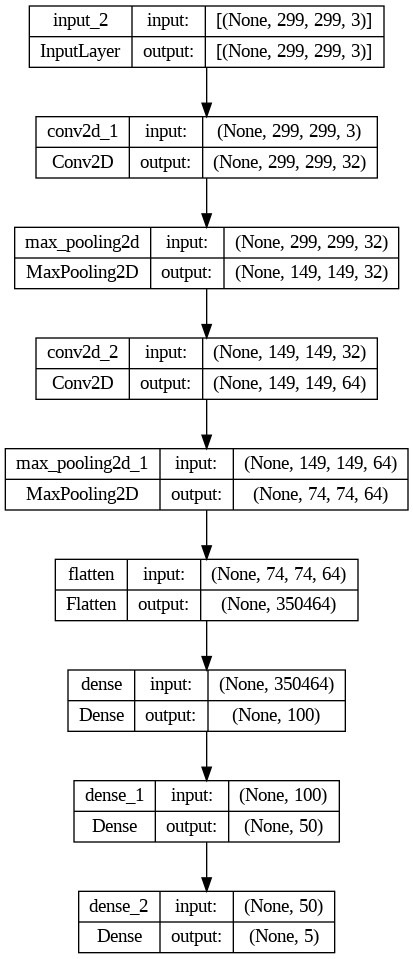

In [48]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [49]:
history_CNN = model_CNN.fit(x=X_train_std,y=y_train,epochs=50,validation_split=0.1,batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 108ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 2.1899 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 1s 107ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 2.2347 - val_accuracy: 0.4750
Epoch 3/50
12/12 [==============================] - 1s 100ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.2069 - val_accuracy: 0.4750
Epoch 4/50
12/12 [==============================] - 1s 100ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.3193 - val_accuracy: 0.4750
Epoch 5/50
12/12 [==============================] - 1s 100ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.3716 - val_accuracy: 0.5000
Epoch 6/50
12/12 [==============================] - 1s 101ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.4095 - val_accuracy: 0.4750
Epoch 7/50
12/12 [==============================] - 1s 100ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.4424 - val_accuracy: 0.4750
Epoch 

In [50]:
history_CNN.history.items()

dict_items([('loss', [0.021243847906589508, 0.008754654787480831, 0.004730226472020149, 0.0023896486964076757, 0.0016608299920335412, 0.0013429283862933517, 0.0010696330573409796, 0.0009004604653455317, 0.000774249027017504, 0.0006751640466973186, 0.0006002854788675904, 0.0005337956827133894, 0.000478643603855744, 0.0004311947850510478, 0.00039673998253419995, 0.000364033185178414, 0.00033529038773849607, 0.00031018865411169827, 0.00028985607787035406, 0.00027156926807947457, 0.0002534637460485101, 0.00023896864149719477, 0.0002243433118565008, 0.0002120557619491592, 0.00019954310846515, 0.00018971417739521712, 0.00018017960246652365, 0.00017071903857868165, 0.0001620217808522284, 0.00015462508599739522, 0.00014762664795853198, 0.00014069535245653242, 0.00013473043509293348, 0.00012894789688289165, 0.00012349680764600635, 0.00011843261017929763, 0.00011358343181200325, 0.00010939216736005619, 0.00010517737246118486, 0.00010133886826224625, 9.738754306454211e-05, 9.391042840434238e-05, 

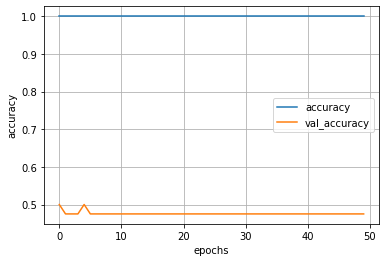

In [51]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [52]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(X_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 0s 84ms/step - loss: 2.9039 - accuracy: 0.5100
Test-loss: 2.903871, Test-accuracy: 0.510000


In [53]:
cProba = model_CNN.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 0s 343ms/step
[[4.6467548e-04 9.7540718e-01 2.4002142e-02 8.6732566e-11 1.2602858e-04]
 [1.8989240e-08 2.2203799e-01 4.2348835e-05 7.7791959e-01 1.2587004e-09]
 [1.6356466e-08 2.8187838e-01 1.9163197e-02 6.9895834e-01 3.5717794e-14]
 [9.9732083e-01 2.2271262e-03 3.8483687e-04 4.1394812e-13 6.7227855e-05]
 [2.5207959e-02 9.5533788e-01 1.8156646e-02 3.2566964e-05 1.2650419e-03]
 [3.2057902e-05 9.8940802e-01 2.7770709e-04 1.0282123e-02 2.4401265e-08]
 [1.2889856e-01 1.8414153e-01 2.7170219e-02 6.5975952e-01 3.0124404e-05]
 [1.4435679e-10 6.7712222e-08 8.8834715e-01 8.3916268e-10 1.1165276e-01]
 [5.3420505e-15 7.9880511e-09 2.8961378e-10 1.0000000e+00 8.7421552e-13]
 [6.8067038e-08 4.3858252e-02 2.4445121e-01 8.2890975e-04 7.1086156e-01]]


In [54]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[1 3 3 0 1 1 3 2 3 4]


In [55]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]


Exercise

    Change hyperparameters(epochs, dense units, kernel size, filter #)
    Add convolution layers, Filters etc...
